In [21]:
import numpy as np #linearna algebra
import pandas as pd #obrada podataka
import matplotlib.pyplot as plt #vizualizacija
import seaborn as sns #vizualizacija

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB, MultinomialNB, GaussianNB, CategoricalNB
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_validate
from warnings import filterwarnings
filterwarnings('ignore')

In [22]:
data = pd.read_csv('data/cell_samples.csv', header=None);
data.columns = data.iloc[0]
data = data.drop(data.index[0])
data.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2
5,4,1,1,3,2,1,3,1,1,2


In [23]:
data.info()
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 1 to 683
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clump        683 non-null    object
 1   UnifSize     683 non-null    object
 2   UnifShape    683 non-null    object
 3   MargAdh      683 non-null    object
 4   SingEpiSize  683 non-null    object
 5   BareNuc      683 non-null    object
 6   BlandChrom   683 non-null    object
 7   NormNucl     683 non-null    object
 8   Mit          683 non-null    object
 9   Class        683 non-null    object
dtypes: object(10)
memory usage: 53.5+ KB
Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object', name=0)


In [24]:
data = data.replace("?", np.nan)

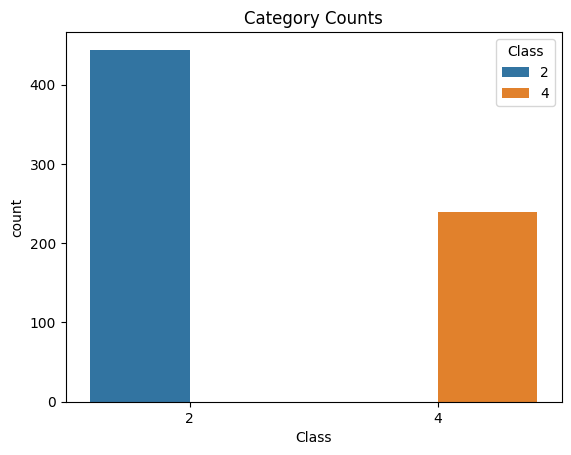

In [25]:
sns.countplot(x='Class',data=data,hue='Class')

plt.title("Category Counts")
plt.show()

In [26]:
X = data.iloc[:, 0:-1]
y = data.iloc[:,-1]

In [27]:
y = data["Class"]
X = data.drop(columns="Class")

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=32)

In [29]:
def train_baseline_model(train, labels, model):
    mdl = model()
    mdl.fit(train, labels)
    return mdl

In [30]:
clf = GaussianNB()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.975609756097561

In [31]:
#ComplementNB
cmp_bl_mdl = train_baseline_model(X_train, y_train, ComplementNB)
print(f'ComplementNB = {cmp_bl_mdl.score(X_test,y_test)}')

ComplementNB = 0.8829268292682927


In [32]:
mul_bl_md2 = train_baseline_model(X_train, y_train, MultinomialNB)
print(f'MultinomialNB = {mul_bl_md2.score(X_test,y_test)}')

MultinomialNB = 0.9219512195121952


In [33]:
#GaussianNB
Gau_md = train_baseline_model(X_train, y_train, GaussianNB)
print(f'GaussianNB = {Gau_md.score(X_test,y_test)}')

GaussianNB = 0.975609756097561


In [34]:
def cross_val(model, X_train, y_train, folds=10):
    scoring = {'acc': 'accuracy',
           'prec_micro': 'precision_micro',
           'rec_micro': 'recall_micro'}
    scores = cross_validate(model, X_train, y_train, scoring=scoring,
                         cv=folds, return_train_score=True)
    return scores

In [35]:
gas_cv_res = cross_val(Gau_md, X_test, y_test, 4)

display(gas_cv_res['test_acc'].mean())
display(gas_cv_res['test_prec_micro'].mean())
display(gas_cv_res['test_rec_micro'].mean())

0.9656862745098038

0.9656862745098038

0.9656862745098038